# **Objectives:**
- Understand the structure and format of the dataset
- Visualize sample images and labels to gain insights
- Handle missing data, anomalies, and outliers effectively
- Apply data augmentation techniques for improved model generalization
- Normalize image pixel values to improve model convergence
- Save the cleaned and processed data for the next steps

# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Deep Learning/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Deep-Learning-Classification-Captions.git

import sys
sys.path.append('/content/Deep-Learning-Classification-Captions.git/utils')
%cd /content/Deep-Learning-Classification-Captions/utils
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Deep-Learning-Classification-Captions'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 4.12 KiB | 4.12 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Deep-Learning-Classification-Captions/utils
/content/Deep-Learning-Classification-Captions/utils
utils.py


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load Data

In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZjXM4RKxlBK9__ZjHBLl5A/aircraft-damage-dataset-v1.tar

--2025-03-21 01:06:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZjXM4RKxlBK9__ZjHBLl5A/aircraft-damage-dataset-v1.tar
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17182208 (16M) [application/x-tar]
Saving to: ‘aircraft-damage-dataset-v1.tar’

aircraft-damage-dat 100%[===================>]  16.39M  21.9MB/s    in 0.7s    

2025-03-21 01:06:54 (21.9 MB/s) - ‘aircraft-damage-dataset-v1.tar’ saved [17182208/17182208]



In [12]:
import tarfile
import os
tar_file_path = "/content/Deep-Learning-Classification-Captions/utils/aircraft-damage-dataset-v1.tar"
extraction_path = "/content/data/raw/"
os.makedirs(extraction_path, exist_ok=True)
with tarfile.open(tar_file_path, "r") as tar:
    tar.extractall(path=extraction_path)

print(f"Contents extracted to: {extraction_path}")

Contents extracted to: /content/data/raw/


In [13]:
def load_data(data_path):
    image_paths = []
    labels = []

    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                image_paths.append(os.path.join(label_path, img_file))
                labels.append(label)

    return pd.DataFrame({"image_path": image_paths, "label": labels})

## Sample Images

In [18]:
def visualize_images(data, sample_size=6):
    plt.figure(figsize=(10, 8))
    for i, img_path in enumerate(data['image_path'][:sample_size]):
        img = plt.imread(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(data['label'].iloc[i])
        plt.axis('off')
    plt.show()

# Data Preprocessing Function Creation

In [20]:
def preprocess_images(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    return img_array / 255.0

In [22]:
def augment_data(X_train, y_train):
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    return datagen.flow(X_train, y_train, batch_size=32)

In [23]:
def split_data(df):
    X = np.array([preprocess_images(img) for img in df['image_path']])
    y = pd.get_dummies(df['label']).values  # One-hot encode labels
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
def load_data(data_path):
    image_paths = []
    labels = []

    # Traverse dataset directories (train/test folders)
    for subset in ['train', 'test']:
        subset_path = os.path.join(data_path, 'aircraft_damage_dataset_v1', subset)
        for label in os.listdir(subset_path):
            label_path = os.path.join(subset_path, label)
            if os.path.isdir(label_path):
                for img_file in os.listdir(label_path):
                    image_paths.append(os.path.join(label_path, img_file))
                    labels.append(label)

    return pd.DataFrame({"image_path": image_paths, "label": labels})

In [27]:
def extract_data(tar_file_path, extraction_path):
    os.makedirs(extraction_path, exist_ok=True)
    with tarfile.open(tar_file_path, "r") as tar:
        tar.extractall(path=extraction_path)
    print(f"Contents extracted to: {extraction_path}")

# Execution

Contents extracted to: /content/data/raw/


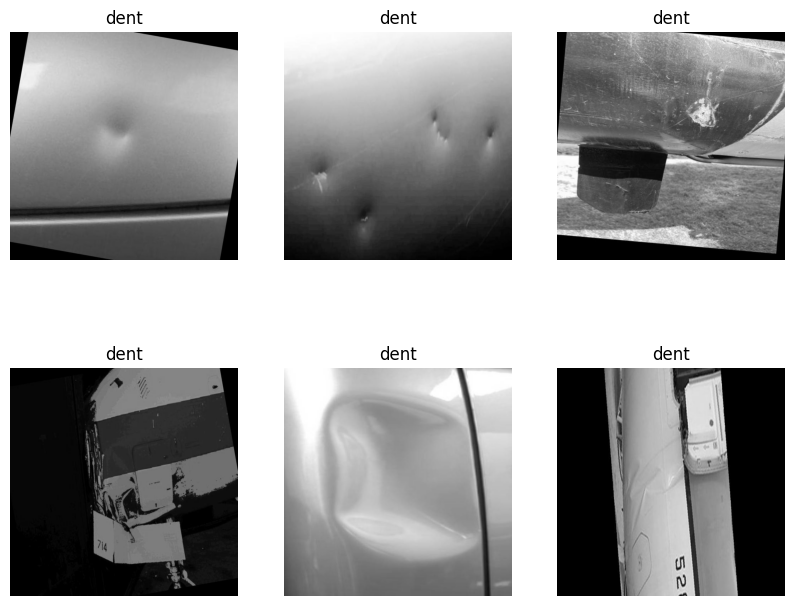

In [31]:
TAR_FILE_PATH = "/content/Deep-Learning-Classification-Captions/utils/aircraft-damage-dataset-v1.tar"
DATA_PATH = '/content/data/raw/'

extract_data(TAR_FILE_PATH, DATA_PATH)
df = load_data(DATA_PATH)
visualize_images(df)

# Train-Test split

In [33]:
X_train, X_test, y_train, y_test = split_data(df)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (280, 224, 224, 3)
Test data shape: (70, 224, 224, 3)


In [34]:
np.save('/content/drive/My Drive/Professional/Portfolio/Deep Learning/Data/X_train.npy', X_train)
np.save('/content/drive/My Drive/Professional/Portfolio/Deep Learning/Data/X_test.npy', X_test)
np.save('/content/drive/My Drive/Professional/Portfolio/Deep Learning/Data/y_train.npy', y_train)
np.save('/content/drive/My Drive/Professional/Portfolio/Deep Learning/Data/y_test.npy', y_test)
print("Data preprocessing complete and saved successfully.")

Data preprocessing complete and saved successfully.
